## Understanding the Problem Statement

* Objective: Classify emails into predefined categoreis(e.g. spam or ham)

* Output: A model that can predict the class of a new email based on its content.

In [82]:
import pandas as pd
import numpy as np
import re    # regular expression

## Data Gathering

* Data Source: Load the dataset, which is a CSV file.

In [83]:
file_path = "./Data/SMSSpamCollection.txt"

file = open(file_path)   ## by default, it read file.
data = file.read()
file.close()

In [84]:
print("Total no of emails: ",len(data.split('\n')))

Total no of emails:  5575


In [85]:
# Make Empty list
x = []
y = []

# Divide line into two parts and store data in x and y
for line in data.split('\n'):
    if len(line.split('\t')) == 2: 
        y.append(line.split('\t')[0])
        x.append(line.split('\t')[1])

# Check code
print("Y is" ,y[1]) # label
print("X is" ,x[0]) # email message
len(x) , len(y)

Y is ham
X is Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


(5574, 5574)

In [86]:
# Create dataframe

email_data = pd.DataFrame({"email_message":x,"labels": y})
email_data.head()

,email_message,labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [87]:
# By using read_table function
#df2 = pd.read_table(file_path)
#df2.columns=['labels','email_message']
#df2.head()

In [88]:
print("Total no. of emails : ",df2.shape[0])

Total no. of emails :  5571


In [89]:
single_email = df2['email_message'][1]
print(single_email)

type(single_email)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


str

## Data Cleaning

In [90]:
# import re (regular expression)
# findall() function:
#                    1. This function searches for all non-overlapping matches of a pattern in a given string.
#                    2. It returns a list of all occurrences that match the specified pattern.
#                    3. In our case, the pattern is simply the character “2”.
re.findall("2",single_email)


['2', '2', '2', '2', '2']

In [91]:
# re.sub()
# This function is used for string substitution or replacement.
# It searches for a pattern in the given string and replaces it with a specified replacement string.
re.sub("[^a-zA-Z]","",single_email) 

# The result of this operation is a cleaned version of the single_email string, containing only letters and spaces

'FreeentryinawklycomptowinFACupfinaltktsstMayTextFAtotoreceiveentryquestionstdtxtrateTCsapplyovers'

In [92]:
single_email.replace('2',"")
single_email.replace('3',"")
single_email.replace('4',"")

# Now, the single_email variable will contain the cleaned version with all occurrences of “2,” “3,” and “4” removed.

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0852810075over18's"

In [93]:
df2

,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [94]:
df2['labels'].value_counts()

# As between ham and spam has much difference. So we need to equalize them into 60:40 ratio at least.

labels
ham     4824
spam     747
Name: count, dtype: int64

In [95]:
df2.head()

,labels,email_message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [96]:
# Seperate labels

ham =  df2[df2['labels'] == "ham"]
spam =  df2[df2['labels'] == "spam"]

print("Spam:",spam.shape )
print("ham:",ham.shape )

Spam: (747, 2)
ham: (4824, 2)


In [97]:
# Take ham sample of length 1000
ham = ham.sample(1000)

# spam = spam.sample(1000,replace=True)
spam.shape  , ham.shape 

# Store in new variable with concat both string

new_df = pd.concat([spam,ham])
new_df.shape 


(1747, 2)

In [98]:
# Check duplicates


print(new_df.duplicated().sum())
print(spam.duplicated().sum())
ham.duplicated().sum() 


117
94


23

In [99]:
new_df['labels'].value_counts()

labels
ham     1000
spam     747
Name: count, dtype: int64

## Data Preprocessing

In [100]:
# Mapping labels in a classification task is a common practice to convert categorical labels (such as “spam” and “ham”) into numerical values that machine learning algorithms can work with. 
# Binary Classification
new_df['labels'] = new_df['labels'].map({'spam':1,'ham':0})

In [101]:
x = new_df['email_message']
y = new_df['labels']

In [102]:
type(x)

pandas.core.series.Series

In [103]:
x = x.values

In [104]:
type(x)

numpy.ndarray

In [105]:
x.shape , len(y)

((1747,), 1747)

In [106]:
# Assuming your original labels are 'spam' and 'ham'
y_train = y_train.map({'spam': 1, 'ham': 0})
([y_train.isnull()])


[504     True
 2890    True
 1852    True
 356     True
 5452    True
         ... 
 2651    True
 4339    True
 1505    True
 5261    True
 5256    True
 Name: labels, Length: 1484, dtype: bool]

In [107]:
# Impute missing labels with 'ham'
y_train.fillna('ham', inplace=True)


C:\Users\Anil sharma\AppData\Local\Temp\ipykernel_11952\1824315619.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ham' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y_train.fillna('ham', inplace=True)


* Text Vectorization: Convert the email text into numerical features using techniques like TF-IDF, Count Vectorizer, or Word Embeddings.

In [108]:
# These classes are used for text feature extraction (converting text data into numerical features).
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# CountVectorizer (Bag-of-Words):
#                                 Creates a document-term matrix where each row represents a document (email in your case), and each column represents a unique word (feature).
#                                 max_features=1500 limits the number of unique words (features) to 1500. Only the most frequent words are considered.
#                                 stop_words='english' removes common English stopwords (e.g., “the,” “and,” “in”) from the text.
bow_obj = CountVectorizer(max_features=1500,stop_words='english')

#fit_transform(x):
#                 Fits the CountVectorizer model to the input data x (which presumably contains email text).
#                 Transforms the text data into a sparse matrix representation (document-term matrix).
#                 The resulting X contains the frequency counts of each word in the emails.


# Bag-of-Words (BoW) approach, which doesn’t consider word order or semantics
X = bow_obj.fit_transform(x)
X 

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14096 stored elements and shape (1747, 1500)>

In [109]:
X_transformed = X.toarray() #The values in the array indicate the frequency of each word in the respective email.

In [110]:
X_transformed

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [111]:
y.shape  , X_transformed.shape 

((1747,), (1747, 1500))

## Splitting the Data

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.15,random_state=42)



1. **Multinomial Naive Bayes (MNB)**:
   - **Use Case**:
     - MNB is commonly used for text classification tasks, especially when dealing with word frequencies (like Bag-of-Words representations).
     - It works well for discrete features (e.g., word counts) and assumes that features are conditionally independent given the class.
   - **Strengths**:
     - Efficient and fast training.
     - Handles large feature spaces (many words).
     - Works well for document classification (e.g., spam detection, sentiment analysis).
   - **Example**:
     - Email spam detection based on word frequencies.

2. **Bernoulli Naive Bayes (BNB)**:
   - **Use Case**:
     - BNB is suitable for binary feature data (presence/absence of features).
     - It assumes that features are binary (0 or 1) and conditionally independent given the class.
   - **Strengths**:
     - Works well for binary data (e.g., presence of specific words).
     - Useful for tasks like document classification with binary features.
   - **Example**:
     - Sentiment analysis (positive/negative) based on the presence of specific words.

In summary, choose MNB when dealing with word frequencies and BNB for binary features. 

In [113]:
## Model training  algorithm train 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB , GaussianNB
mnb = MultinomialNB()
bnb = BernoulliNB()


mnb.fit(x_train,y_train) 
bnb.fit(x_train,y_train) 
print("ALgorithms trained on the data!") 

print("Multinomial Naive bayes")
print("Training score : ",mnb.score(x_train,y_train))
print("Testing score : ",  mnb.score(x_test,y_test) )
print()
print("Bernoli Naive bayes")
print("Training score : ",bnb.score(x_train,y_train))
print("Testing score : ",  bnb.score(x_test,y_test) )

ALgorithms trained on the data!
Multinomial Naive bayes
Training score :  0.97911051212938
Testing score :  0.973384030418251

Bernoli Naive bayes
Training score :  0.9642857142857143
Testing score :  0.9581749049429658


## Model Evaluation

* Performace Metrics: Using metrics like precision to evaluate the model on the test set

In [114]:
### prediction 
prediction = mnb.predict(x_test)
prediction

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [115]:
y_test.values

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [116]:
evaluation_df =  pd.DataFrame({"actual_class":y_test.values,"predicted_class":prediction})
evaluation_df.head(40)

,actual_class,predicted_class
0,0,0
1,0,1
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


* Cross-Validation: Perform cross-validation to ensure the model's robustness.

In [117]:
evaluation_df['actual_class'] = evaluation_df['actual_class'].map({1:'spam',0:'ham'})
evaluation_df['predicted_class'] = evaluation_df['predicted_class'].map({1:'spam',0:'ham'})

In [118]:
evaluation_df.head(40)

,actual_class,predicted_class
0,ham,ham
1,ham,spam
2,spam,spam
3,spam,spam
4,spam,spam
5,ham,ham
6,ham,ham
7,spam,spam
8,spam,spam
9,spam,spam


The `confusion_matrix` and `classification_report` are essential tools for evaluating the performance of classification models. Let's dive into each one:

1. **Confusion Matrix**:
   - A confusion matrix provides a summary of the model's predictions compared to the actual ground truth labels.
   - It breaks down the predictions into four categories:
     - **True Positives (TP)**: Correctly predicted positive instances (e.g., correctly identified spam emails).
     - **True Negatives (TN)**: Correctly predicted negative instances (e.g., correctly identified non-spam emails).
     - **False Positives (FP)**: Incorrectly predicted positive instances (model predicted spam, but it was not).
     - **False Negatives (FN)**: Incorrectly predicted negative instances (model predicted non-spam, but it was spam).
   - The matrix looks like this:

     |                | Predicted Negative | Predicted Positive |
     |----------------|--------------------|--------------------|
     | Actual Negative| TN                 | FP                 |
     | Actual Positive| FN                 | TP                 |

2. **Classification Report**:
   - The classification report provides additional metrics for evaluating model performance:
     - **Precision**: Proportion of true positive predictions among all positive predictions (TP / (TP + FP)).
     - **Recall (Sensitivity)**: Proportion of true positive predictions among all actual positive instances (TP / (TP + FN)).
     - **F1-score**: Harmonic mean of precision and recall (2 * (Precision * Recall) / (Precision + Recall)).
     - **Support**: Number of occurrences of each class in the actual data.
   - It also includes an overall accuracy score.



In [119]:
from sklearn.metrics import confusion_matrix, classification_report

In [120]:
matrix = confusion_matrix(evaluation_df['actual_class'],evaluation_df['predicted_class'])
matrix 

array([[136,   5],
       [  2, 120]], dtype=int64)

## Data Visualization

In [121]:
import seaborn   as sns 
import matplotlib.pyplot as plt 

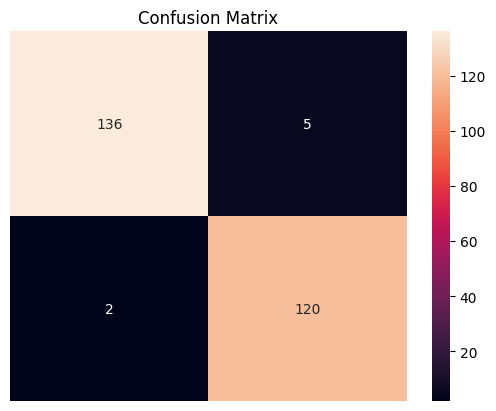

In [123]:
# annot=True adds numeric annotations (values) to each cell.
# fmt='d' specifies that the annotations should be displayed as integers.
sns.heatmap(matrix,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

In [124]:
print(classification_report(evaluation_df['actual_class'],evaluation_df['predicted_class']))

              precision    recall  f1-score   support

         ham       0.99      0.96      0.97       141
        spam       0.96      0.98      0.97       122

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263



## Model Deployment

In [125]:
## Models save

import joblib , os
os.makedirs('models',exist_ok=True)

joblib.dump(mnb,'./models/multinomialnaivebayes.lb')
joblib.dump(bnb,'./models/bernolinaivebayes.lb')
joblib.dump(bow_obj,'./models/countvectorizer.lb')
print("Your object is saved!")


Your object is saved!
